In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew, boxcox
sns.set()
warnings.filterwarnings('ignore')

In [2]:
copper_data= pd.read_csv(r'Copper_Set.csv')
copper_data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


# **Preprocessing**

In [3]:
copper_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [4]:
copper_data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [5]:
# Some rubbish values are present in ‘Material_Reference’ which starts with ‘00000’ value
print(copper_data['material_ref'].isna().sum())
copper_data[(copper_data['material_ref'].isna()==False) &(copper_data['material_ref'].str.startswith('00000'))]

77919


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.0
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.0
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.0
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0


In [6]:
# Some rubbish values are present in ‘Material_Reference’ which starts with ‘00000’ value which should be converted into null.
print(copper_data['material_ref'].isna().sum())
copper_data['material_ref'] =np.where((copper_data['material_ref'].isna()==False) &(copper_data['material_ref'].str.startswith('00000')), 
                                    np.nan, 
                                    copper_data['material_ref'])
print(copper_data['material_ref'].isna().sum())

77919
100645


In [7]:
copper_data.isna().sum()

id                    2
item_date             1
quantity tons         0
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         1
selling_price         1
dtype: int64

In [8]:
copper_data.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      11495
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

In [9]:
# The 'id' column have 181671 unique values. This column not affect model building and prediction. we have to drop the 'id' column
copper_data.drop('id', axis = 1, inplace = True)
copper_data.head(3)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [10]:
print('Number of empty cells in material_ref column :',copper_data.material_ref.isna().sum())
print('Percentage of empty cells in material_ref column :',(copper_data.material_ref.isna().sum()/copper_data.shape[0])*100)

Number of empty cells in material_ref column : 100645
Percentage of empty cells in material_ref column : 55.39898609039318


In [11]:
# Percentage of empty cells in "material_ref" column is 55.40% .
# while train model "material_ref" column leads to decrease the accuracy. we can remove the column
copper_data.drop('material_ref', axis = 1, inplace = True)
copper_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [12]:
copper_data.isna().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [13]:
# TYPE COSTING

copper_data['quantity tons'] = copper_data['quantity tons'].astype(float, errors='ignore')
copper_data['customer'] = copper_data['customer'].astype(int,errors='ignore')
copper_data['country'] = copper_data['country'].astype(int, errors='ignore')
copper_data['application'] = copper_data['application'].astype(int, errors='ignore')
copper_data['thickness'] = copper_data['thickness'].astype(float, errors='ignore')
copper_data['width'] = copper_data['width'].astype(float, errors='ignore')
copper_data['selling_price'] = copper_data['selling_price'].astype(float, errors='ignore')


# Converting object type data into date format
copper_data['item_date'] = copper_data['item_date'].astype(str)
copper_data['delivery date'] = copper_data['delivery date'].astype(str)
copper_data['delivery date'] = pd.to_datetime(copper_data['delivery date'],format = '%Y%m%d.0', errors='coerce').dt.strftime('%Y/%m/%d')
copper_data['item_date'] = pd.to_datetime(copper_data['item_date'],format = '%Y%m%d.0', errors='coerce').dt.strftime('%Y/%m/%d')

copper_data

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021/04/01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021/07/01,854.00
1,2021/04/01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021/04/01,1047.00
2,2021/04/01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021/01/01,644.33
3,2021/04/01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021/01/01,768.00
4,2021/04/01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021/03/01,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...
181668,2020/07/02,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020/07/01,591.00
181669,2020/07/02,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020/07/01,589.00
181670,2020/07/02,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020/07/01,619.00
181671,2020/07/02,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020/07/01,601.00


In [14]:
# To coverting inappropriate values data into null values in quatity tons column

copper_data['quantity tons'] = np.where(copper_data['quantity tons']=='e', np.nan, copper_data['quantity tons'])

# To coverting negative values data into null values in numerical column
copper_data['quantity tons'] =copper_data['quantity tons'].astype(float)
copper_data['quantity tons'] = np.where(copper_data['quantity tons'] < 0 , np.nan, copper_data['quantity tons'])

copper_data['selling_price'] =copper_data['selling_price'].astype(float)
copper_data['selling_price'] = np.where(copper_data['selling_price'] < 0 , np.nan, copper_data['selling_price'])


In [15]:
for col in copper_data.columns:

    print(col,'----------mode---------->', copper_data[col].mode()[0])

item_date ----------mode----------> 2020/12/02
quantity tons ----------mode----------> 1e-05
customer ----------mode----------> 30157111.0
country ----------mode----------> 78.0
status ----------mode----------> Won
item type ----------mode----------> W
application ----------mode----------> 10.0
thickness ----------mode----------> 2.0
width ----------mode----------> 1250.0
product_ref ----------mode----------> 611993
delivery date ----------mode----------> 2021/01/01
selling_price ----------mode----------> 832.0


In [16]:
copper_data.isna().sum()


item_date         3
quantity tons     5
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     6
dtype: int64

In [17]:
for col in copper_data.columns:
    copper_data[col].fillna(copper_data[col].mode()[0], inplace = True)
copper_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [18]:
# comparing the Number of row count and Number of empty cells count,Number of empty cell count is less than Number of row count.
# Number of empty cell count is negligible. so, we have to remove the empty cells
copper_data.dropna(axis=0, inplace = True)

# To reset the index values
copper_data.reset_index(drop=True, inplace=True)

In [19]:
copper_data.shape

(181673, 12)

In [20]:
copper_data.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [21]:
copper_data.nunique()

item_date           250
quantity tons    181668
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
product_ref          33
delivery date        26
selling_price      9790
dtype: int64

In [22]:
# identifying the categorical and numerical columns
numeric_columns = ['quantity tons', 'width', 'thickness', 'selling_price']
category_columns =['item_date', 'delivery date', 'customer', 'country', 'status', 'item type', 'application', 'product_ref']

In [23]:
for col in ['country', 'status', 'item type','application']:
    print(col,copper_data[col].unique())
    print('--'*20)

country [ 28.  25.  30.  32.  38.  78.  27.  77. 113.  79.  26.  39.  40.  84.
  80. 107.  89.]
----------------------------------------
status ['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']
----------------------------------------
item type ['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']
----------------------------------------
application [10. 41. 28. 59. 15.  4. 38. 56. 42. 26. 27. 19. 20. 66. 29. 22. 40. 25.
 67. 79.  3. 99.  2.  5. 39. 69. 70. 65. 58. 68.]
----------------------------------------


In [24]:
for col in ['status', 'item type']:
    print(copper_data[col].value_counts())
    print('--'*20)

status
Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64
----------------------------------------
item type
W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: count, dtype: int64
----------------------------------------


# **Skewness**

In [41]:
# identifying the categorical and numerical columns
numerical_columns = ['quantity tons', 'width', 'thickness', 'selling_price']
categorical_columns =['item_date', 'delivery date', 'customer', 'country', 'status', 'item type', 'application', 'product_ref']
copper_data[numerical_columns].skew()

quantity tons    424.690816
width              0.374597
thickness        303.447617
selling_price    301.388088
dtype: float64

<Axes: >

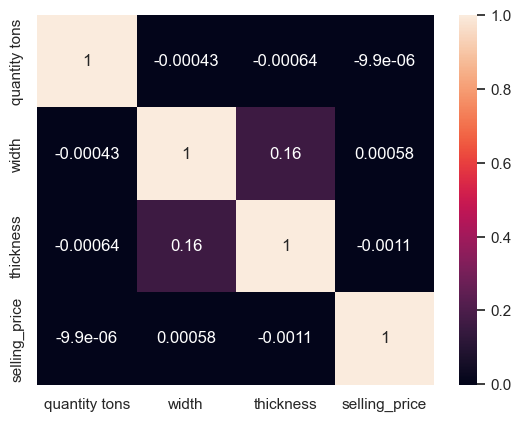

In [26]:
sns.heatmap(copper_data[numerical_columns].corr(), annot = True)

In [27]:
def skewness_plot(copper_data, *column):
    nrow = len(column)
    plot_no=0
    for col_name in column:
        if 'log' in col_name or 'sqrt' in col_name or 'boxcox' in col_name:
            title= "After Treatment"
        else:
            title = "Before Treatment"

        plt.figure(figsize=(16, 16))

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.boxplot(x=col_name, data=copper_data)
        plt.title('Boxplot - '+ title)

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.distplot(copper_data[col_name])
        plt.title(f'Distplot - Skewness: {skew(copper_data[col_name])}')

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.violinplot(x=col_name, data=copper_data)
        plt.title('Violinplot - ' + title)

    plt.tight_layout()
    
    return plt.show()

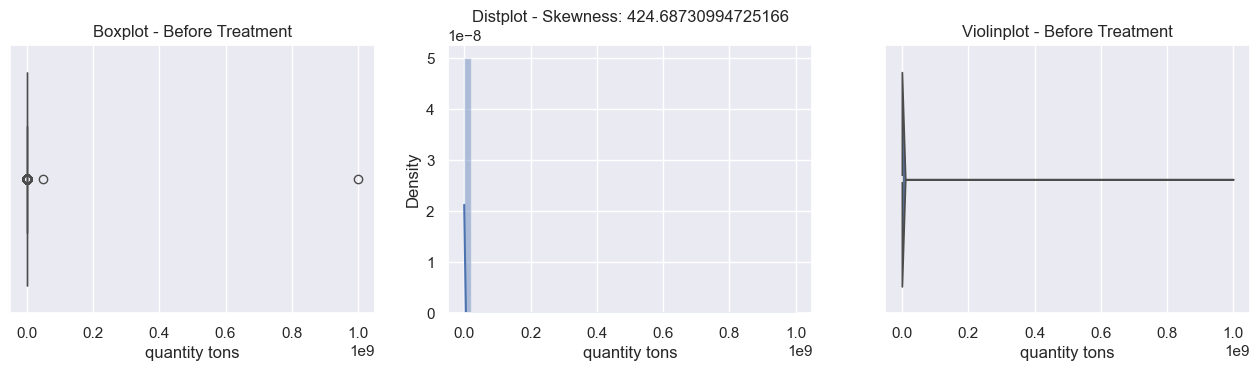

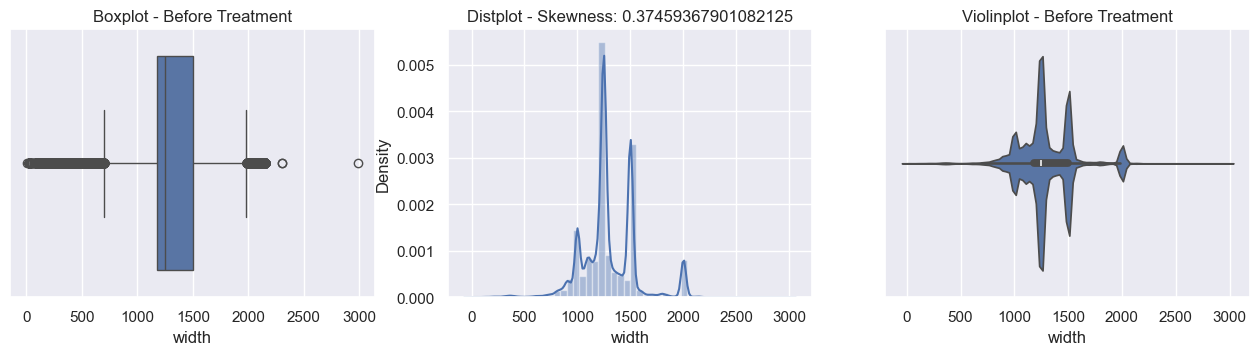

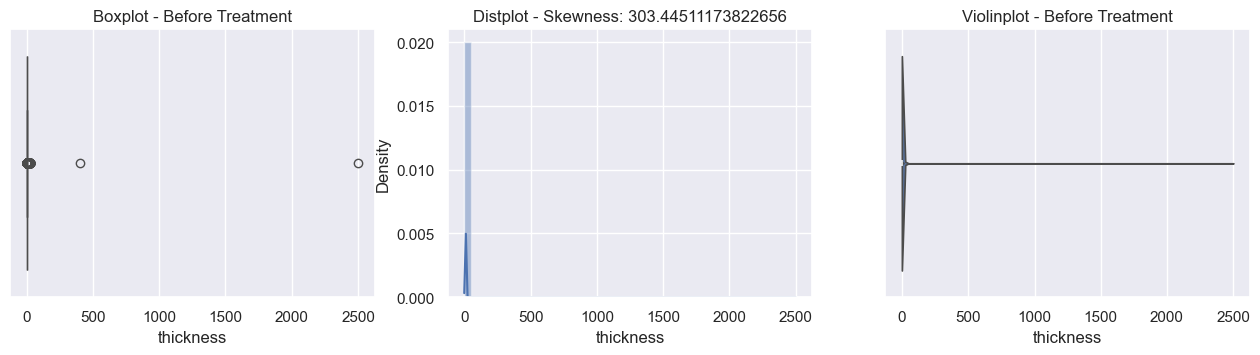

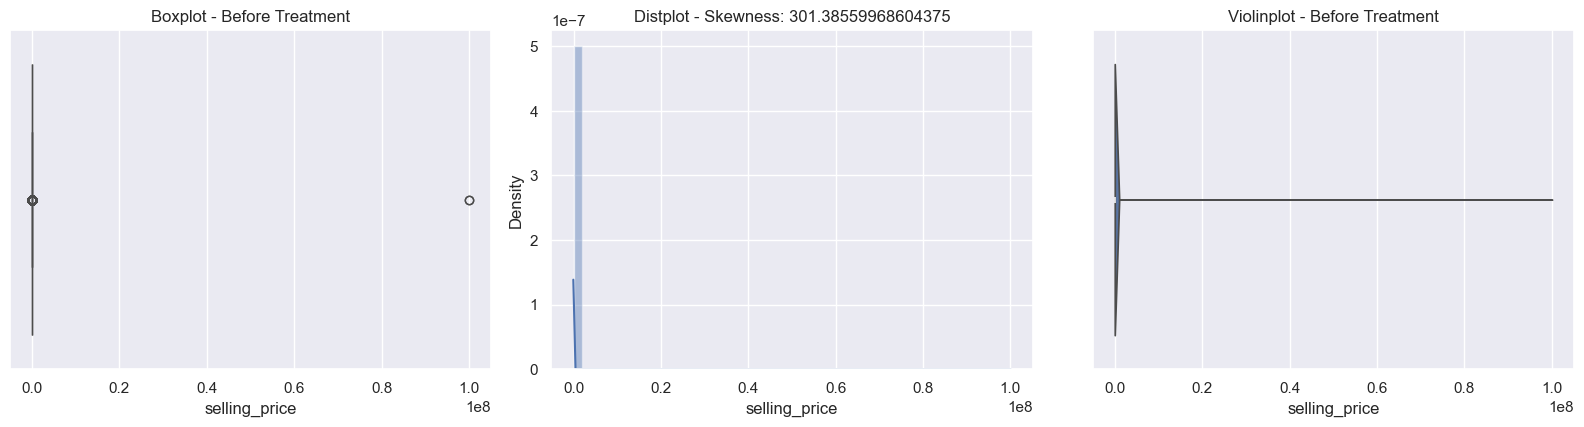

In [28]:
numerical_columns = ['quantity tons', 'width', 'thickness', 'selling_price']
skewness_plot(copper_data, *numerical_columns)

In [29]:
def Log_Transformation(copper_data, *column):

    for col_name in column:
        # Log Tansformation
        copper_data[col_name+'_log'] = np.log1p(copper_data[col_name])

    column =[i for i in copper_data.columns if 'log' in i]

    return skewness_plot(copper_data, * column)

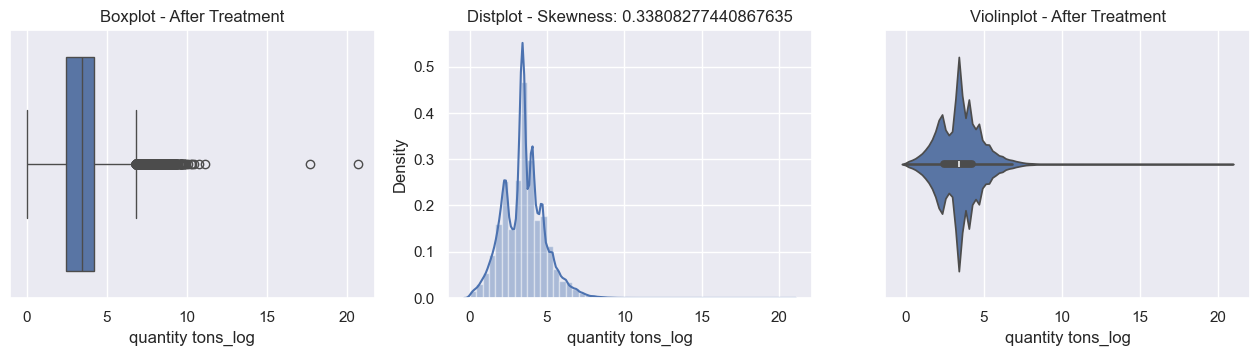

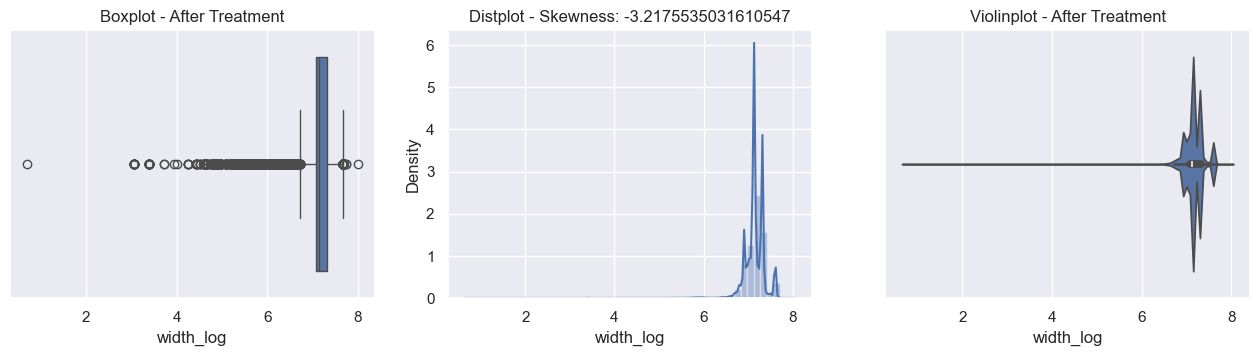

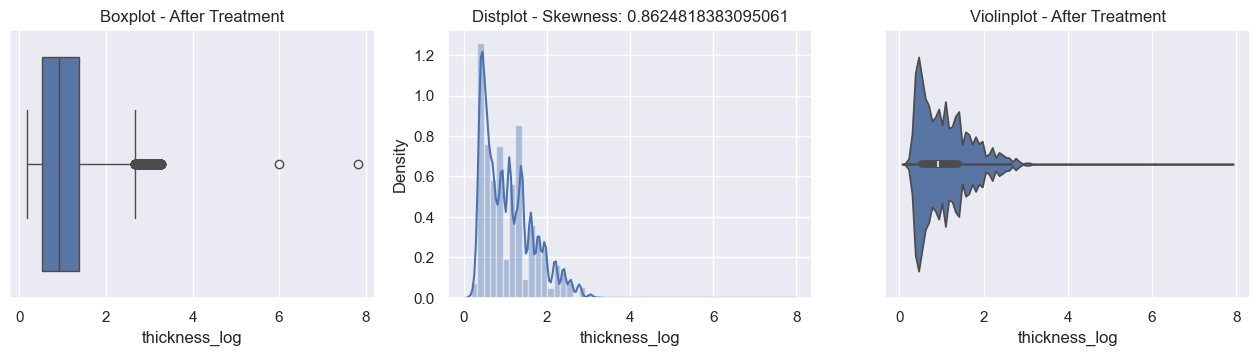

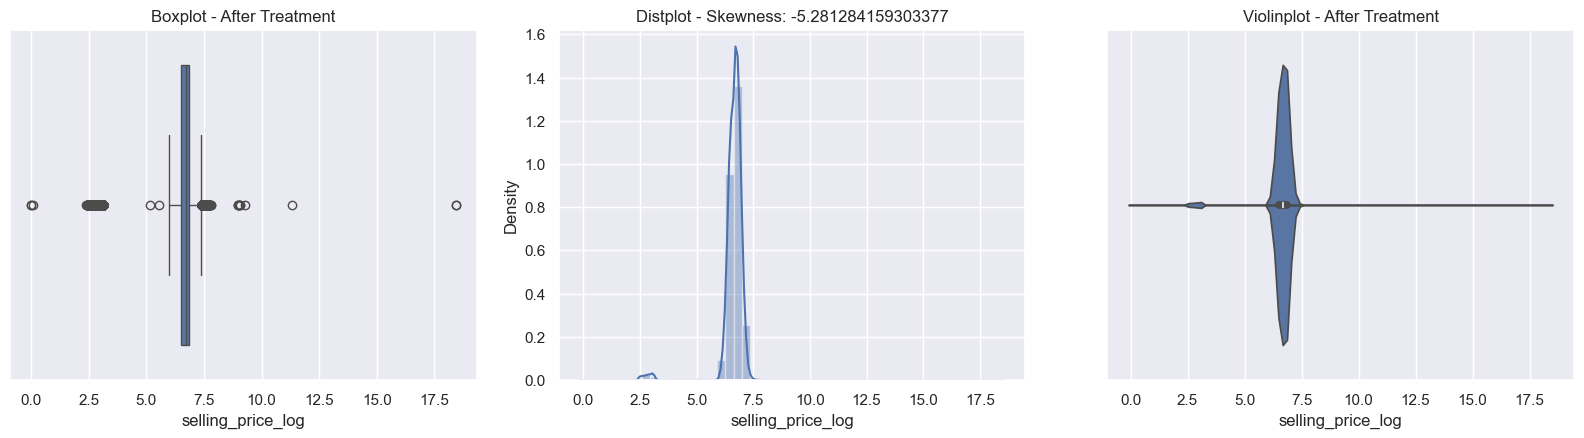

In [30]:
Log_Transformation(copper_data, *numeric_columns)

In [31]:
def Square_Root_Transformation(copper_data, *column):

    for col_name in column:
        # Square root Tansformation
        copper_data[col_name+'_sqrt'] = np.sqrt(copper_data[col_name])

    column =[i for i in copper_data.columns if 'sqrt' in i]

    return skewness_plot(copper_data, * column)

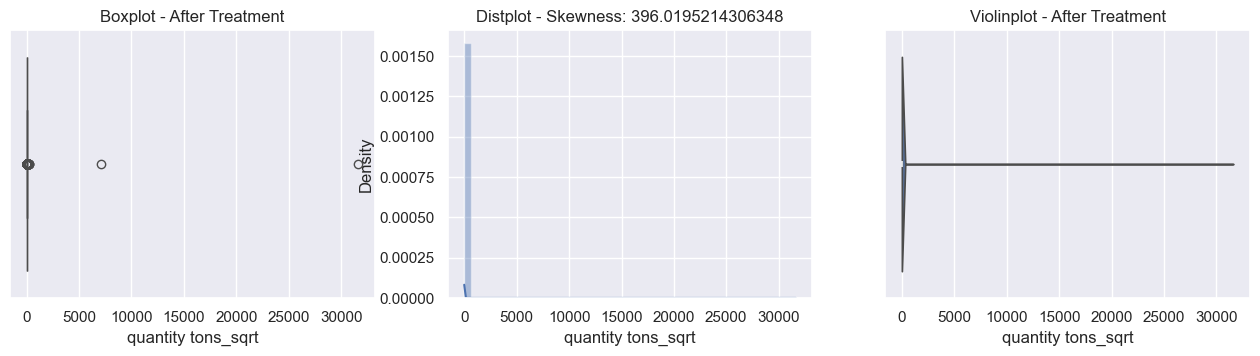

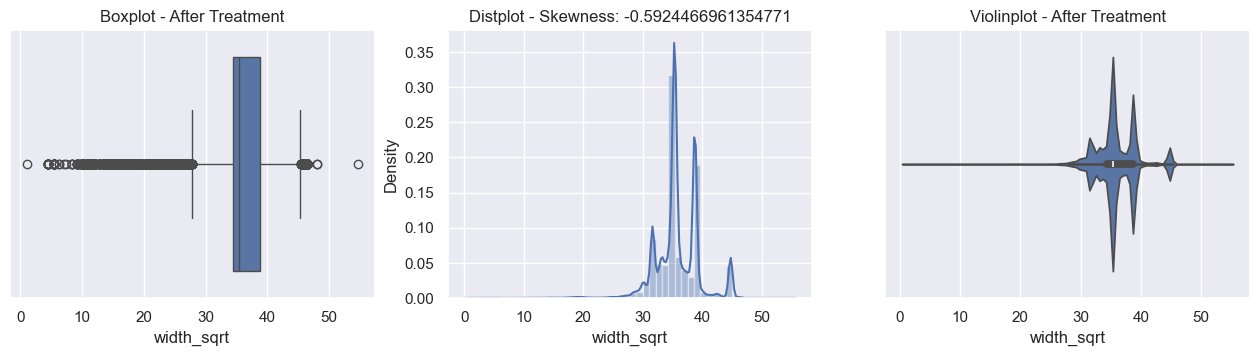

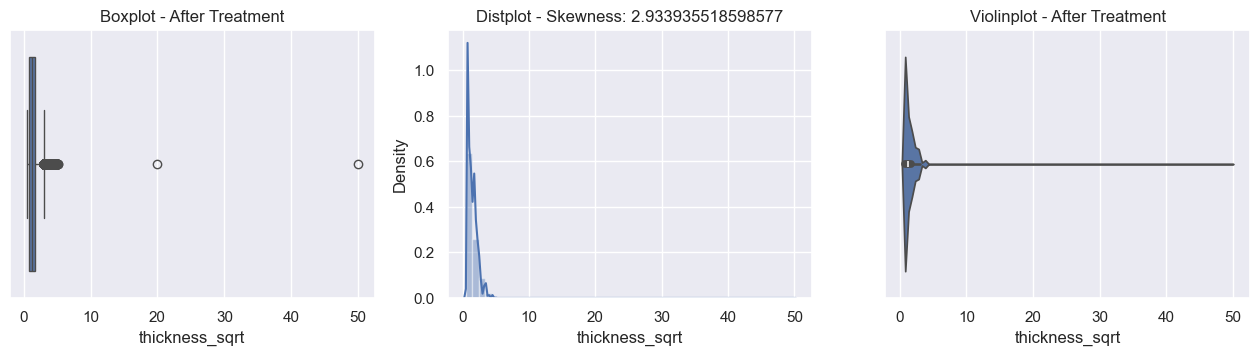

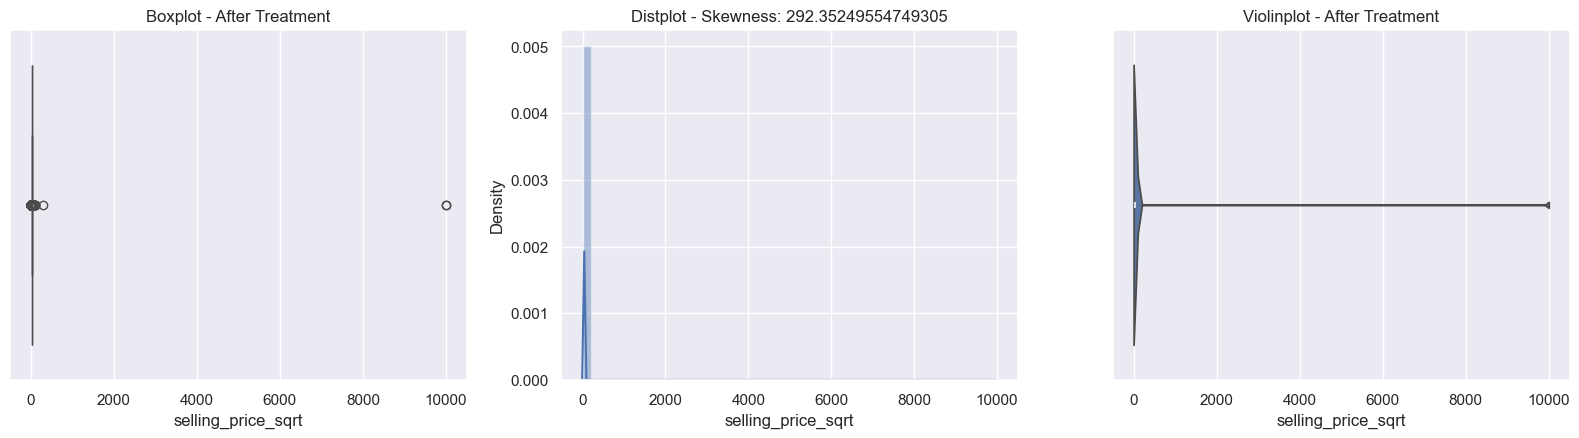

In [32]:
Square_Root_Transformation(copper_data, *numerical_columns)

In [33]:
def BoxCox_Transformation(copper_data, *column):

    for col_name in column:
        # BoxCox Transformation
        transformed_data, lambda_value = boxcox(copper_data[col_name] + 1) # Adding 1 to handle zero values
        # Update the DataFrame with the transformed data
        copper_data[col_name + '_boxcox'] = transformed_data

    column =[i for i in copper_data.columns if 'boxcox' in i]

    return skewness_plot(copper_data, * column)

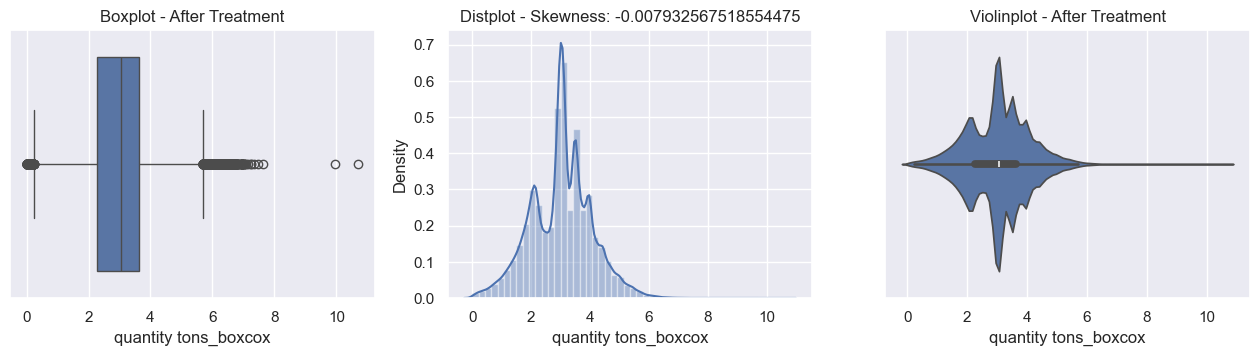

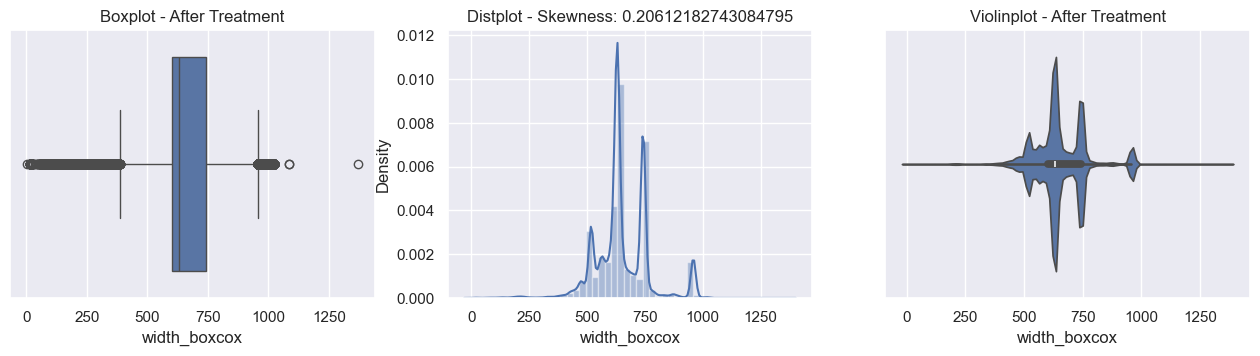

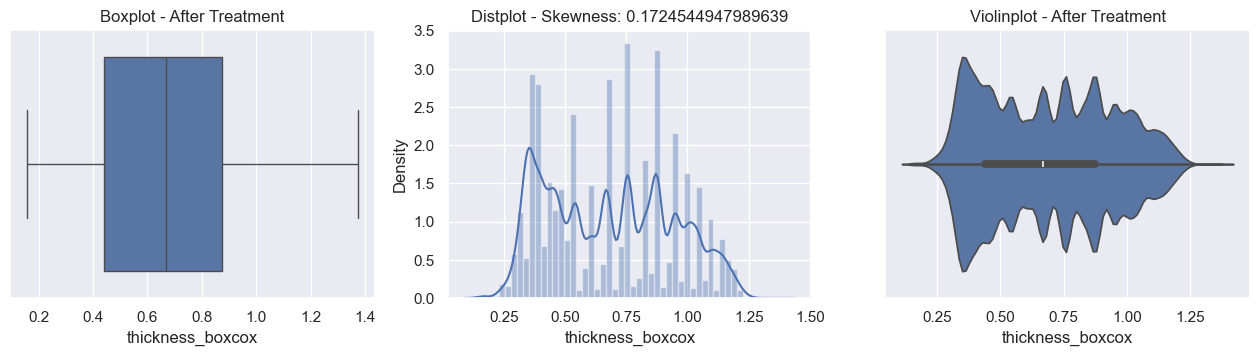

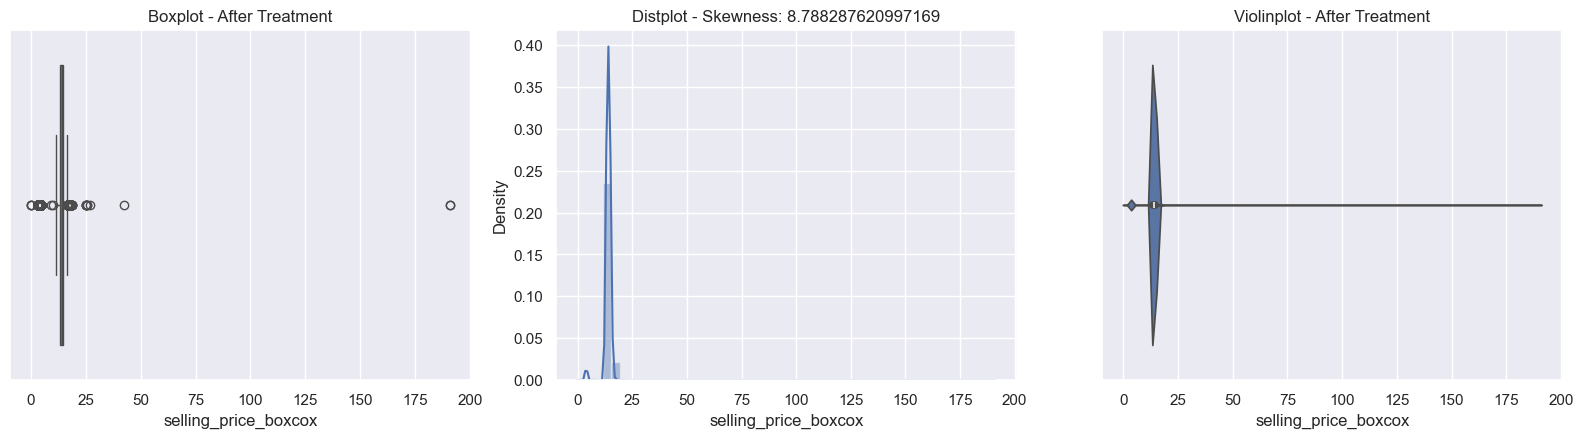

In [34]:
BoxCox_Transformation(copper_data, *numerical_columns)

In [35]:
def handling_skewness(copper_data, *column):

    for col_name in column:
        
        if col_name == 'width' or col_name =='selling_price':
            copper_data[col_name+'_sqrt'] = np.cbrt(copper_data[col_name])
        else:
            # Log Tansformation
            copper_data[col_name+'_log'] = np.log1p(copper_data[col_name])

    column =[i for i in copper_data.columns if 'log' in i or 'sqrt' in i]

    return skewness_plot(copper_data, *column)


In [45]:
copper_data[[i for i in copper_data if i not in categorical_columns]].skew()

quantity tons           424.690816
thickness               303.447617
width                     0.374597
selling_price           301.388088
quantity tons_log         0.338086
width_log                -3.217580
thickness_log             0.862489
selling_price_log        -5.281328
quantity tons_sqrt      396.022791
width_sqrt               -0.592452
thickness_sqrt            2.933960
selling_price_sqrt      292.354909
quantity tons_boxcox     -0.007933
width_boxcox              0.206124
thickness_boxcox          0.172456
selling_price_boxcox      8.788360
dtype: float64

In [50]:
for col, i in copper_data[[i for i in copper_data if i not in categorical_columns]].skew():
    print(col, i)

TypeError: cannot unpack non-iterable float object

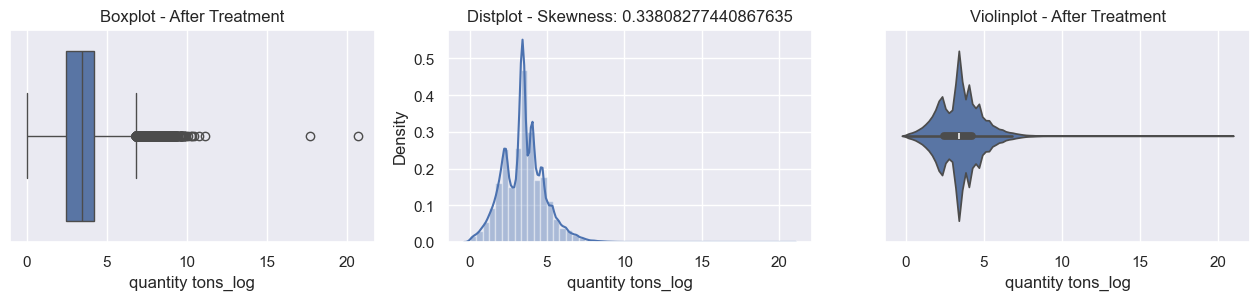

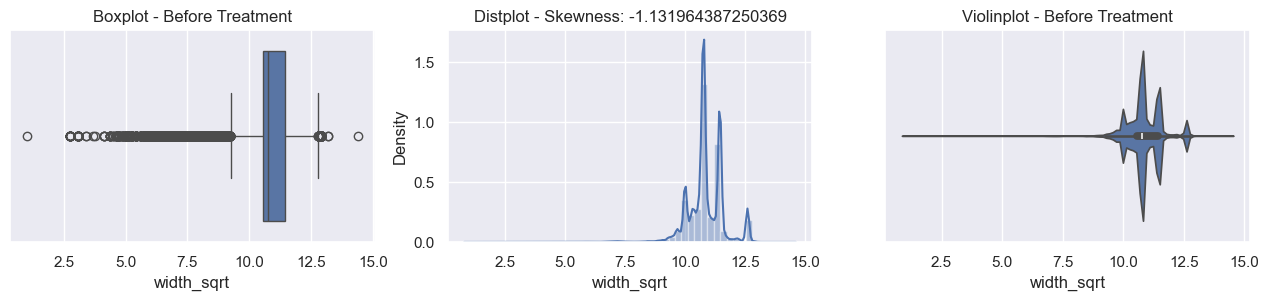

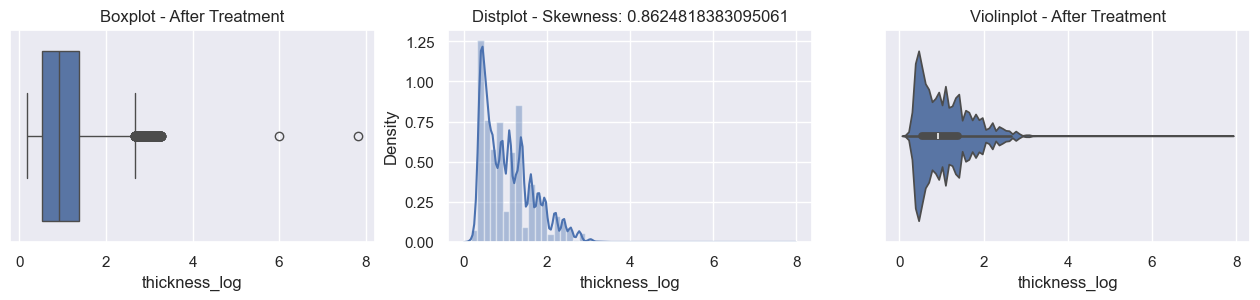

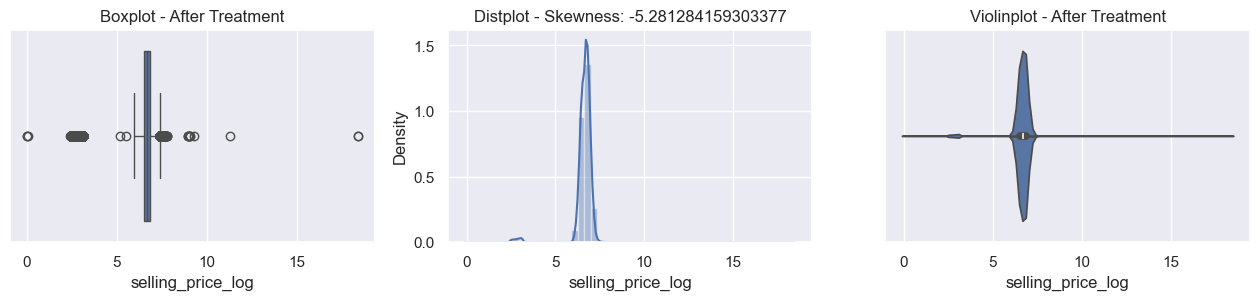

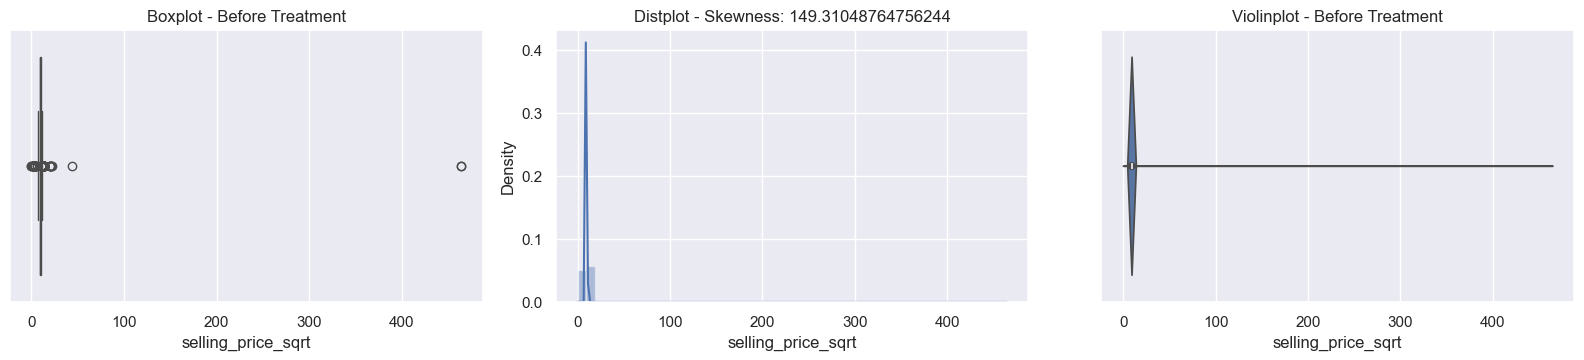

In [ ]:
column = ['quantity tons', 'width', 'thickness', 'selling_price'] 
handling_skewness(copper_data, *column)

# log1p - > 0.33, -3.2, 0.8, -5.2
#sqrt - width -0.5
#  boxcox - > -0.0079, 8.788, 0.206, 0.172

In [ ]:
skew(copper_data['selling_price_log'])
copper_data[[i for i in copper_data.columns if 'log' in i]].isna().sum()

quantity tons_log    0
thickness_log        0
selling_price_log    5
dtype: int64

In [ ]:
copper_data[copper_data['selling_price']<0]

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,quantity tons_log,width_sqrt,thickness_log,selling_price_log
28,2021/04/01,99.059199,30153510.0,30.0,Won,W,41.0,0.595,1207.0,611993,2021/04/01,-1160.0,4.605762,34.741906,0.466874,NaN
44761,2021/02/04,101.397995,30198657.0,32.0,Won,W,41.0,1.250,1100.0,1721130331,2021/04/01,-730.0,4.628867,33.166248,0.810930,NaN
44810,2021/02/03,12.225889,30157111.0,78.0,Won,W,41.0,0.750,1250.0,164141591,2021/04/01,-445.0,2.582176,35.355339,0.559616,NaN
44865,2021/02/03,28.368563,30217604.0,27.0,Not lost for AM,PL,10.0,1.500,1270.0,164141591,2021/05/01,-25.0,3.379925,35.637059,0.916291,NaN
105189,2020/11/12,5.280274,30209814.0,25.0,Won,W,15.0,6.000,1250.0,1671863738,2021/02/01,-336.0,1.837414,35.355339,1.945910,NaN


In [ ]:
copper_data[copper_data['selling_price']<0]
copper_data[copper_data['quantity tons']<0]
copper_data[copper_data['width']<0]
copper_data[copper_data['thickness']<0]
inconsistance_data= copper_data[(copper_data['selling_price']<0) | (copper_data['quantity tons']<0) | (copper_data['width'] <0 )| (copper_data['thickness'] <0)]
inconsistance_data.values


array([], shape=(0, 18), dtype=object)

In [ ]:
copper_data.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'quantity tons_Log', 'width_Log',
       'thickness_Log', 'selling_price_Log'],
      dtype='object')

In [ ]:
# sns.heatmap(copper_data[[ 'quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'product_ref',
#         'selling_price', 'quantity tons_Log', 'width_Log',
#        'thickness_Log', 'selling_price_Log']], annot= True)

In [ ]:
from sklearn.preprocessing import PowerTransformer
copper_data['new'] = PowerTransformer('box-cox').fit_transform(copper_data[['selling_price']])

skewness_plot(copper_data, 'new')

ValueError: The Box-Cox transformation can only be applied to strictly positive data

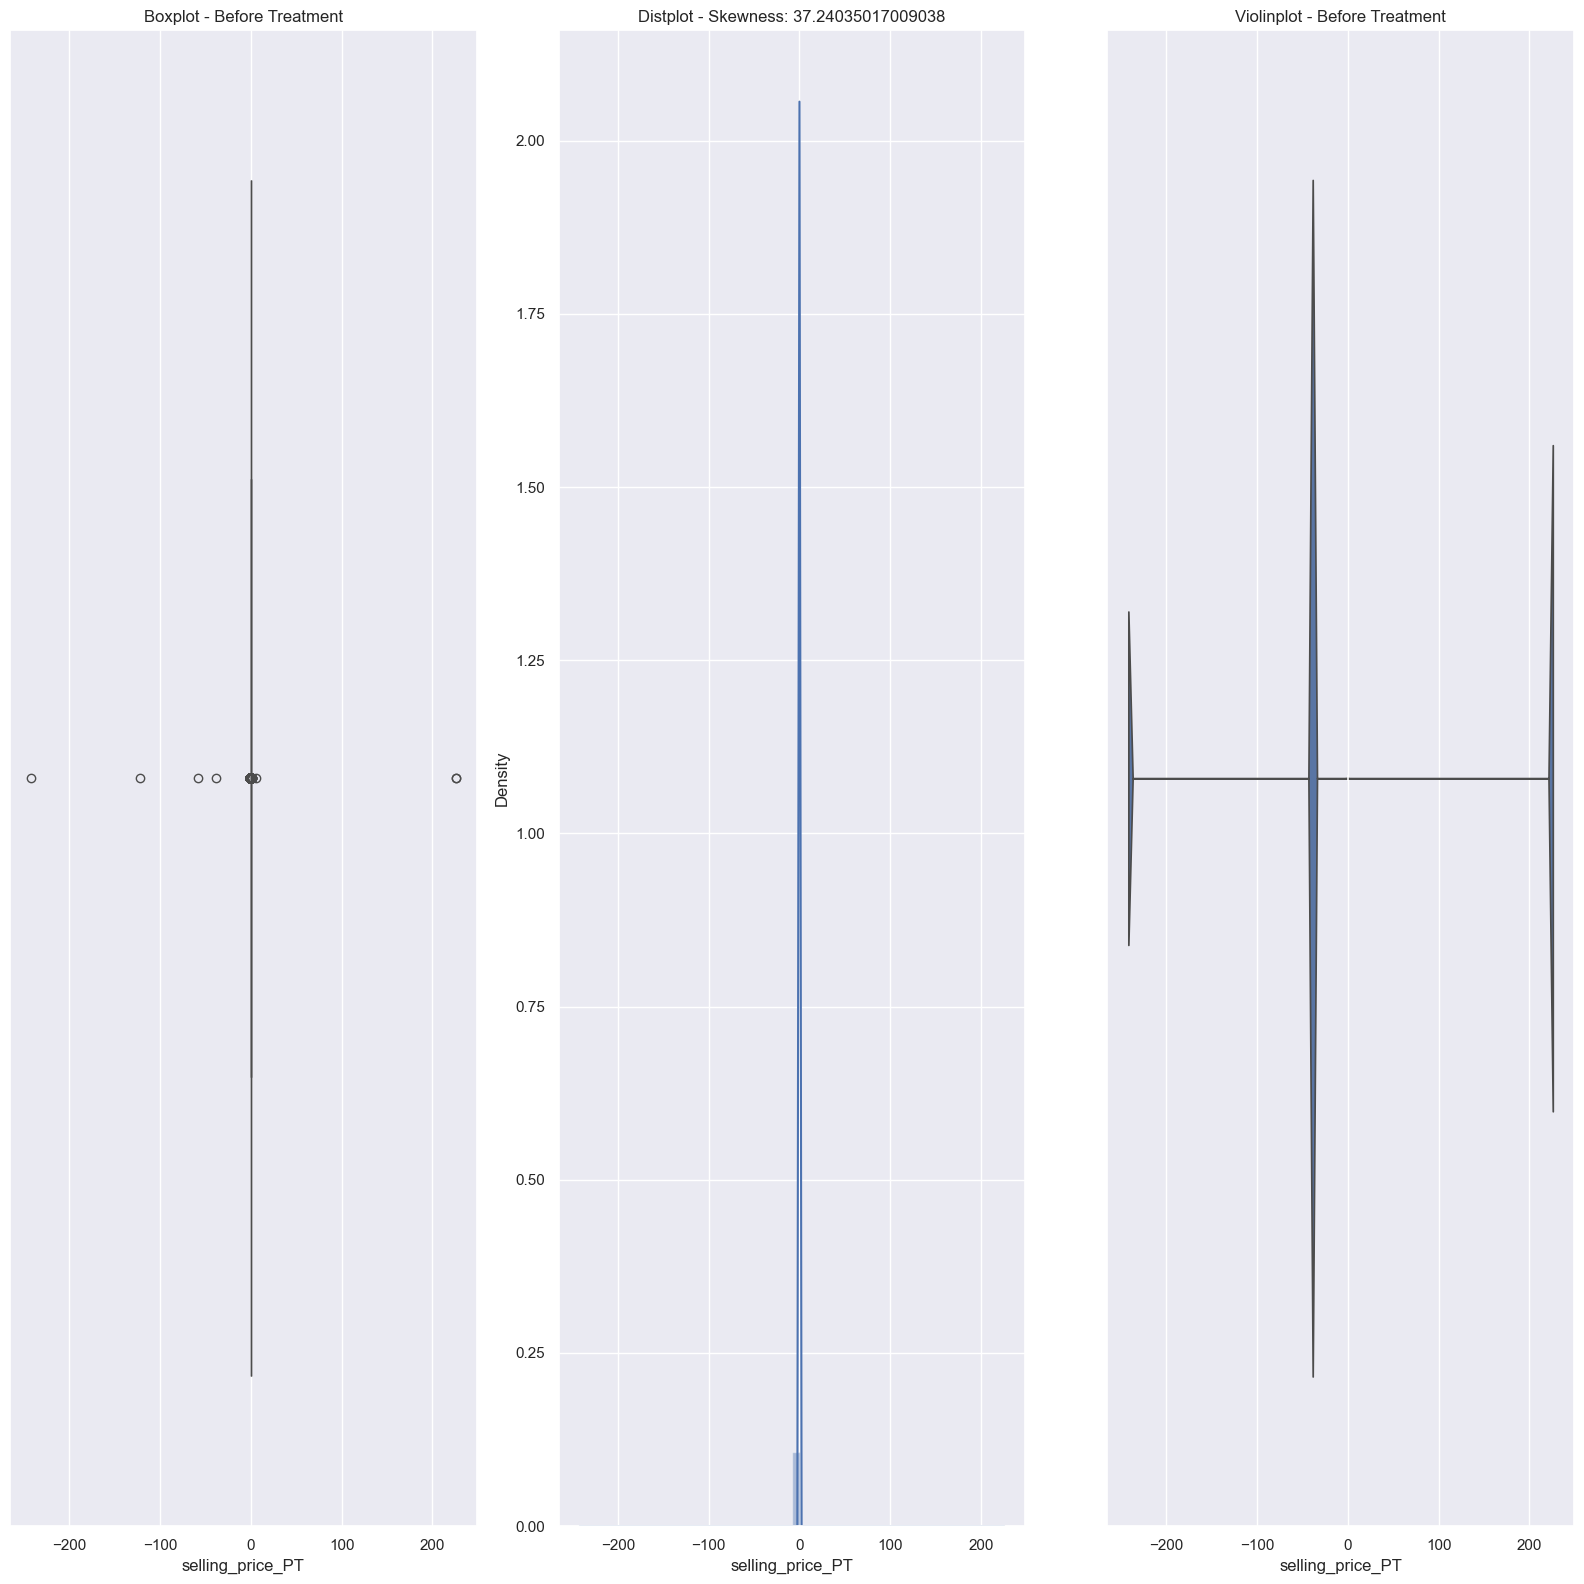

In [ ]:
skewness_plot(copper_data, *['selling_price_PT'])

In [ ]:
copper_data['selling_price_PT']


0         0.021090
1         0.085895
2        -0.058114
3        -0.010094
4        -0.086171
            ...   
181632   -0.080210
181633   -0.081057
181634   -0.068493
181635   -0.075995
181636   -0.073482
Name: selling_price_PT, Length: 181637, dtype: float64

In [ ]:
copper_data[[i for i in copper_data.columns if copper_data[i].dtype != 'object']].corr()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price,quantity tons_log,width_sqrt,thickness_log,selling_price_log,selling_price_sqrt,quantity tons_BoxCox,selling_price_BoxCox,width_BoxCox,thickness_BoxCox,new
quantity tons,1.000000,-0.000031,-0.001531,-0.001955,-0.000640,-0.000428,-0.001086,-0.000010,0.031726,-0.000242,-0.001802,-0.001051,-0.001054,0.018433,-0.001386,-0.000400,-0.001780,-0.001386
customer,-0.000031,1.000000,0.015935,-0.010105,0.009589,0.009203,-0.007716,-0.000053,0.002355,0.009106,0.020752,-0.061191,-0.032061,0.002668,-0.053130,0.009243,0.017852,-0.053130
country,-0.001531,0.015935,1.000000,-0.019496,-0.019428,0.055423,-0.147482,0.002991,-0.090730,0.054236,-0.060882,-0.029845,-0.014997,-0.090355,-0.026621,0.055483,-0.068422,-0.026621
application,-0.001955,-0.010105,-0.019496,1.000000,-0.059560,-0.204502,-0.131755,0.001462,0.067991,-0.199198,-0.180398,0.023889,0.039702,0.065042,0.045479,-0.204109,-0.198263,0.045479
thickness,-0.000640,0.009589,-0.019428,-0.059560,1.000000,0.161713,0.038081,-0.001130,0.011020,0.143017,0.425966,-0.073329,-0.060603,0.012071,-0.082100,0.159339,0.364322,-0.082100
width,-0.000428,0.009203,0.055423,-0.204502,0.161713,1.000000,-0.034460,0.000583,0.032491,0.979275,0.397015,-0.070707,-0.067876,0.035577,-0.090548,0.999611,0.378967,-0.090548
product_ref,-0.001086,-0.007716,-0.147482,-0.131755,0.038081,-0.034460,1.000000,0.002118,0.064042,-0.033664,0.190587,0.000933,-0.014300,0.064736,-0.013587,-0.034127,0.253245,-0.013587
selling_price,-0.000010,-0.000053,0.002991,0.001462,-0.001130,0.000583,0.002118,1.000000,-0.001118,0.000749,-0.003860,0.070630,0.792868,-0.001037,0.343276,0.000615,-0.004607,0.343276
quantity tons_log,0.031726,0.002355,-0.090730,0.067991,0.011020,0.032491,0.064042,-0.001118,1.000000,0.038321,0.035539,0.022908,-0.000219,0.997190,0.008897,0.033448,0.043867,0.008897
width_sqrt,-0.000242,0.009106,0.054236,-0.199198,0.143017,0.979275,-0.033664,0.000749,0.038321,1.000000,0.349754,-0.065874,-0.062795,0.041237,-0.083960,0.984425,0.334421,-0.083960
